# Three attributes game

Each action has 3 numerical atributes.  The three attributes are ranked for tiebreaking.  You win if your action is greater than the opponent's action in 2 out of 3 attributes.  In case that one attribute is tied, the tie is broken based on the rank of the winning attribute.

In the following, consider 3 non-negative integer attributes, each of which takes values {0, 1, 2, 3}.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# get all integer vectors with entries {0, ..., 5}
temp = np.ones((6, 6, 6))
vectors = np.array(np.nonzero(temp)).T
# restrict to vectors with sums in {3, .., 7}
sums = np.sum(vectors, 1)
vectors = vectors[np.logical_and(sums >= 3, sums <= 7)]
vectors

array([[0, 0, 3],
       [0, 0, 4],
       [0, 0, 5],
       [0, 1, 2],
       [0, 1, 3],
       [0, 1, 4],
       [0, 1, 5],
       [0, 2, 1],
       [0, 2, 2],
       [0, 2, 3],
       [0, 2, 4],
       [0, 2, 5],
       [0, 3, 0],
       [0, 3, 1],
       [0, 3, 2],
       [0, 3, 3],
       [0, 3, 4],
       [0, 4, 0],
       [0, 4, 1],
       [0, 4, 2],
       [0, 4, 3],
       [0, 5, 0],
       [0, 5, 1],
       [0, 5, 2],
       [1, 0, 2],
       [1, 0, 3],
       [1, 0, 4],
       [1, 0, 5],
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 3],
       [1, 1, 4],
       [1, 1, 5],
       [1, 2, 0],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 3],
       [1, 2, 4],
       [1, 3, 0],
       [1, 3, 1],
       [1, 3, 2],
       [1, 3, 3],
       [1, 4, 0],
       [1, 4, 1],
       [1, 4, 2],
       [1, 5, 0],
       [1, 5, 1],
       [2, 0, 1],
       [2, 0, 2],
       [2, 0, 3],
       [2, 0, 4],
       [2, 0, 5],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2,

In [3]:
# compute payoff sign matrix
a0_dom = np.sign(vectors[:, [0]] - vectors[:, [0]].T)
a1_dom = np.sign(vectors[:, [1]] - vectors[:, [1]].T)
a2_dom = np.sign(vectors[:, [2]] - vectors[:, [2]].T)

scores = 4 * (a0_dom > 0).astype(int) + 3 * (a1_dom > 0).astype(int) + 2 * (a2_dom > 0).astype(int)
win_mat = (scores > scores.T).astype(int)
p_sign = win_mat - win_mat.T



In [4]:
flag = True
# delete strictly dominating or dominant vectors
while flag:
    to_delete = np.logical_or(np.sum(p_sign == 1, 1) == 0, np.sum(p_sign == -1, 1) == 0)
    print(vectors[to_delete])
    vectors = vectors[~to_delete]
    p_sign = p_sign[~to_delete, :][:, ~to_delete]
    flag = (np.sum(to_delete) > 0)

[[0 0 3]]
[[0 0 4]]
[[0 0 5]]
[]


In [5]:
# check a few entries manually
i = 3
j = 5
print(vectors[[i, j], :])
p_sign[i, j]

[[0 1 5]
 [0 2 2]]


-1

In [6]:
# function to form payoff matrix from signs and rewards
def form_payoff(p_sign, rewards):
    payoff = np.dot(np.diag(rewards), (p_sign==1))
    payoff = payoff - payoff.T
    return payoff

In [7]:
# tune rewards
n = len(vectors)
# desired nash equilibrium
target_p = np.ones(n)/n

def tune_rewards(p_sign, target_p, learning_rate = 0.002, n_iterations = 50000):
    # uniform rewards to begin
    rewards = np.ones(len(p_sign))
    # determine values of strategies
    # decrease the rewards of high-value strategies and increase the rewards of low-value strategies
    all_rewards = []
    all_values = []

    for iter_no in range(n_iterations):
        all_rewards.append(rewards)
        payoff = form_payoff(p_sign, rewards)
        values = np.dot(payoff, target_p)
        all_values.append(values)
        rewards = rewards - learning_rate * values

    all_rewards = np.array(all_rewards)
    all_values = np.array(all_values)
    return rewards, values, all_rewards, all_values

In [8]:
rewards, values, all_rewards, all_values = tune_rewards(p_sign, target_p)

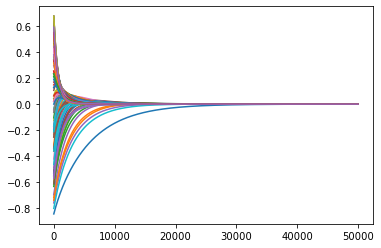

In [9]:
plt.plot(all_values)
plt.show()

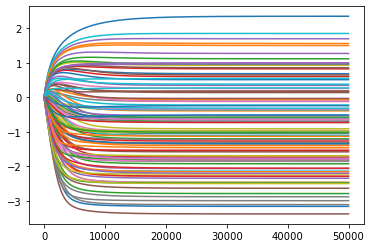

In [10]:
plt.plot(np.log(all_rewards))
plt.show()

In [11]:
np.sort(rewards)

array([ 0.03418412,  0.04253023,  0.04475566,  0.05017632,  0.05614831,
        0.06165231,  0.0718994 ,  0.08234427,  0.08391491,  0.08476842,
        0.08576722,  0.09603049,  0.10142214,  0.1019449 ,  0.10873172,
        0.11110773,  0.1160132 ,  0.11815081,  0.12723966,  0.12864727,
        0.14611754,  0.15655322,  0.15974356,  0.16435879,  0.16751062,
        0.17067822,  0.17773857,  0.18458958,  0.20637584,  0.21342982,
        0.21634691,  0.23204467,  0.24734016,  0.25914391,  0.26219159,
        0.26370079,  0.2678274 ,  0.28222045,  0.29473404,  0.30074385,
        0.32339147,  0.3285013 ,  0.3290925 ,  0.34968559,  0.36048291,
        0.3633119 ,  0.377726  ,  0.38163666,  0.40261283,  0.48152847,
        0.49575849,  0.49967081,  0.52532085,  0.52535826,  0.52697662,
        0.5514399 ,  0.56552189,  0.5920308 ,  0.60092165,  0.6768965 ,
        0.68851286,  0.69831871,  0.71365448,  0.73223456,  0.7875332 ,
        0.80141163,  0.88938467,  0.89511704,  0.93039361,  0.96

In [12]:
# Select a subset with intermediate rewards
subset = np.logical_and(rewards > 0.1, rewards < 4.0)
np.sum(subset)

78

In [13]:
vectors_sub = vectors[subset, :]
p_sign_sub = p_sign[subset, :][:, subset]
rewards, values, all_rewards, all_values = tune_rewards(p_sign_sub, np.ones(len(p_sign_sub))/len(p_sign_sub))

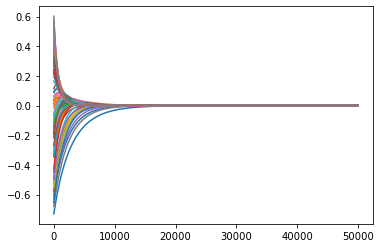

In [14]:
plt.plot(all_values)
plt.show()

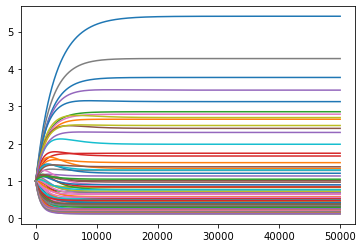

In [15]:
plt.plot(all_rewards)
plt.show()

In [16]:
# discretize rewards
d_rewards = np.floor(rewards/np.min(rewards) * 10)
probs = np.ones(len(p_sign_sub))/len(p_sign_sub)
payoff = form_payoff(p_sign_sub, d_rewards)
np.max(d_rewards)

450.0

In [17]:
def evolve_strategy(payoff, probs, learning_rate = 0.0005, n_iterations = 1000000):

    all_probs = []
    all_values = []

    for iter_no in range(n_iterations):
        all_probs.append(probs)
        #probs = np.mean(all_probs, 0)
        #print(probs)
        values = np.dot(payoff, probs)
        all_values.append(values)
        probs = probs * (1 + learning_rate * values)
        probs = probs/np.sum(probs)

    all_probs = np.array(all_probs)
    all_values = np.array(all_values)
    probs = np.mean(all_probs[int(n_iterations/2):, :], 0)
    values = np.dot(payoff, probs)
    return probs, values, all_probs, all_values

In [18]:
probs, values, all_probs, all_values = evolve_strategy(payoff, probs, 0.00001, 1000000)

In [19]:
np.max(values), np.min(values)

(0.10764668803240296, -0.5247658417452965)

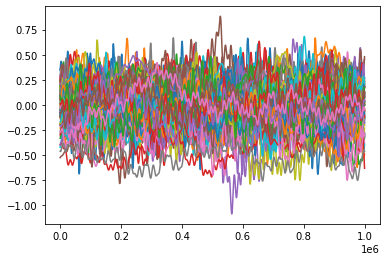

In [20]:
plt.plot(all_values)
plt.show()

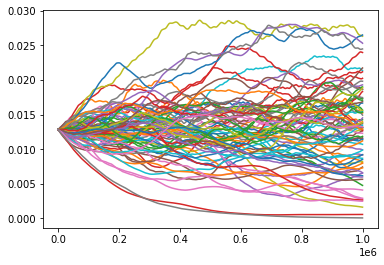

In [21]:
plt.plot(all_probs)
plt.show()

In [22]:
np.sum(probs > 0.01)

56

In [23]:
results = pd.DataFrame({
    'VP': d_rewards.astype(int), 
    'A0': vectors_sub[:, 0], 'A1': vectors_sub[:, 1], 'A2': vectors_sub[:, 2], 
    'total': np.sum(vectors_sub, 1),
    'prob': np.floor(probs* 1000)/10})
results.iloc[np.argsort(-probs)[:np.sum(probs > 0.01)], :].reset_index(drop = True)

,VP,A0,A1,A2,total,prob
0,60,2,2,0,4,2.7
1,10,3,4,0,7,2.6
2,29,4,0,2,6,2.5
3,29,3,1,1,5,2.5
4,44,1,1,4,6,2.2
5,45,0,3,4,7,2.1
6,27,2,1,2,5,1.8
7,26,1,4,1,6,1.8
8,32,3,0,3,6,1.8
9,70,1,4,0,5,1.8


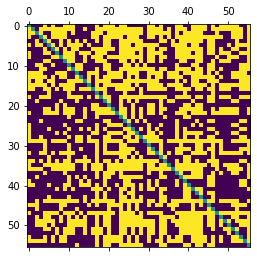

In [24]:
inds = np.argsort(-probs)[:np.sum(probs > 0.01)]
plt.matshow(p_sign_sub[inds, :][:, inds])